In [1]:
! pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.4 MB/s eta 0:00:00


In [2]:
! pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.6 MB/s eta 0:00:00


In [3]:
! pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.2 MB/s eta 0:00:00


In [4]:
! pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a905e646c1dde59e4e82aea51bc91eb63e16fa34be09f146b2b7e4fc88f84d2c
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


# **Quantum Teleportation**

In [5]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

In [6]:
qr = QuantumRegister(3)
cr1 = ClassicalRegister(1)
cr2 = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr, cr1, cr2)

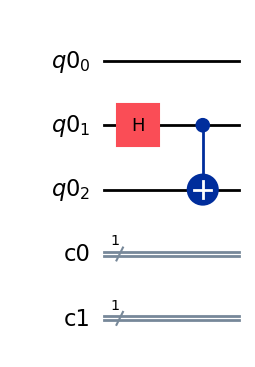

In [7]:
def entanglement_bell_pair(qc, a, b):
  qc.h(a) # Put qubit a into state |+> or |-> using hadamard gate
  qc.cx(a,b) # CNOT with a as control and b as target
# Eve entangles qubits q1 and q2
entanglement_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw('mpl')

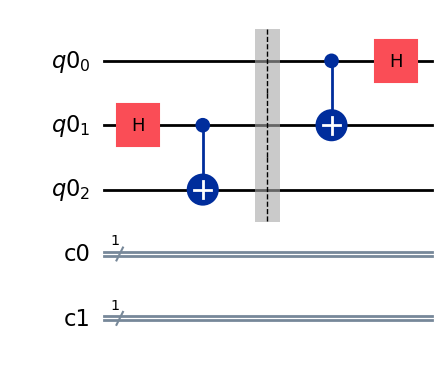

In [8]:
def alice_state_qubits(qc, psi, a):
  qc.cx(psi, a) #psi is the state of q0
  qc.h(psi)

# call the function to our circuit
teleportation_circuit.barrier()
alice_state_qubits(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output='mpl')

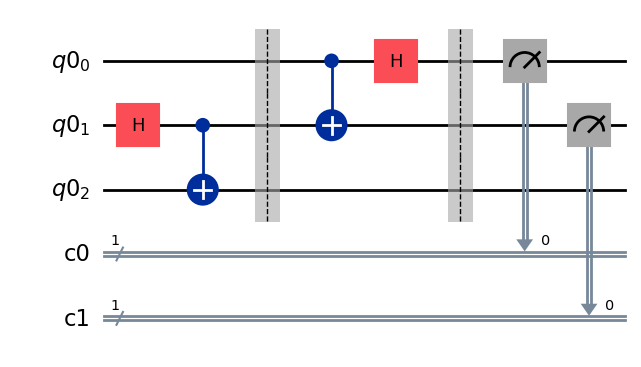

In [9]:
def measure_classical_send(qc, a, b):
  qc.barrier()
  qc.measure(a,0)
  qc.measure(b,1)
measure_classical_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw(output='mpl')

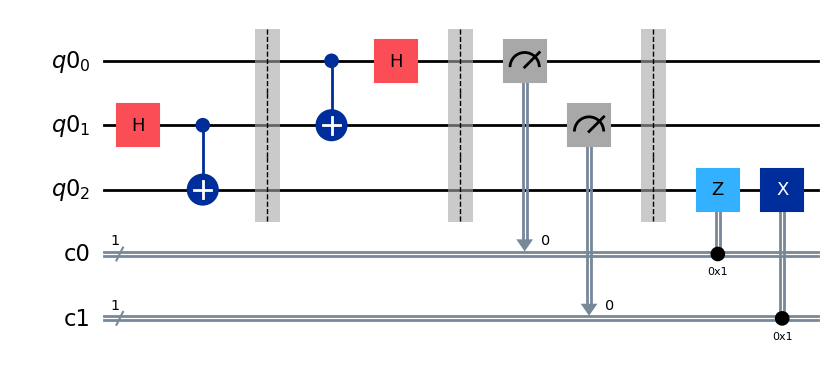

In [10]:
def bob_apply_gates(qc, qubit, cr1, cr2):
  qc.z(qubit).c_if(cr1, 1) #if cr1 is 1 apply Z gate
  qc.x(qubit).c_if(cr2, 1) #if cr2 is 1 apply x gate, look at table above
# Let's apply this to our circuit:
teleportation_circuit.barrier() # Use barrier to separate steps
bob_apply_gates(teleportation_circuit, 2, cr1, cr2)
teleportation_circuit.draw(output='mpl')

In [11]:
def random_state(nqubits):
  """Creates a random nqubit state vector"""
  from numpy import append, array, sqrt
  from numpy.random import random
  real_parts = array([])
  im_parts = array([])
  for amplitude in range(2**nqubits):
    real_parts = append(real_parts, (random()*2)-1)
    im_parts = append(im_parts, (random()*2)-1)
  # Combine into list of complex numbers:
  amps = real_parts + 1j*im_parts
  # Normalise
  magnitude_squared = 0
  for a in amps:
    magnitude_squared += abs(a)**2
  amps /= sqrt(magnitude_squared)
  return amps
# specify a random state
psi = random_state(1)

In [12]:
from qiskit.circuit.library import Initialize
init_gate = Initialize(psi)

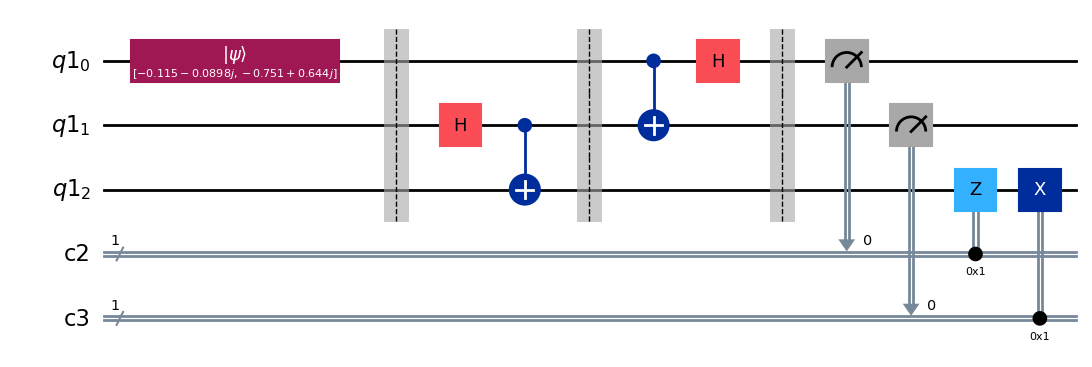

In [13]:
qr = QuantumRegister(3)
cr1 = ClassicalRegister(1)
cr2 = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr1, cr2)
#let's initialise Alice's q0
qc.append(init_gate, [0])
qc.barrier()
# teleportation protocol
entanglement_bell_pair(qc, 1, 2)
qc.barrier()
# Send q1 to Alice and q2 to Bob
alice_state_qubits(qc, 0, 1)
# alice sends to Bob
measure_classical_send(qc, 0, 1)
# Bob decodes qubits
bob_apply_gates(qc, 2, cr1, cr2)
qc.draw(output='mpl')

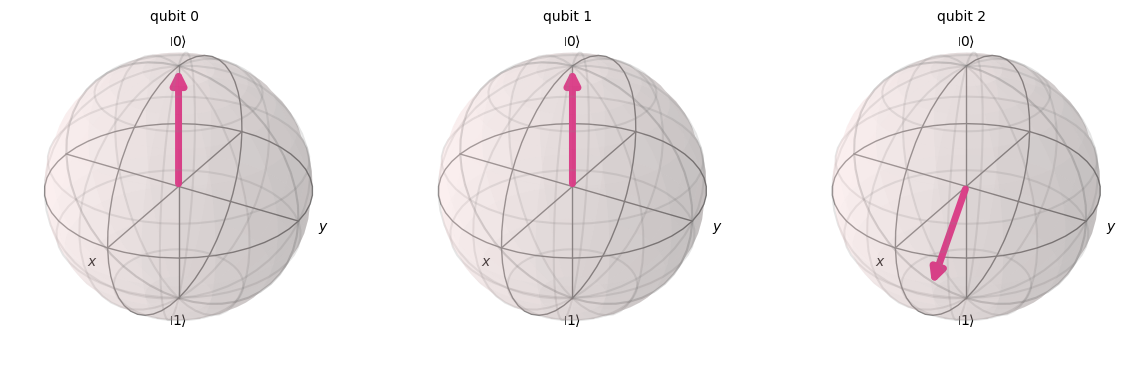

In [14]:
from qiskit_aer import Aer
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result()
sv = result.get_statevector(qc)
plot_bloch_multivector(sv)

In [ ]:
inverse_init_gate
init_gate.gates_to_uncompute()
qc.append(inverse_init_gate, [2])
qc.draw(output='mpl')

In [ ]:
#add a new classical register to see the result
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw(output='mpl')

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
backend = BasicSimulator()
tqc = transpile(qc, backend)
counts = backend.run(tqc).result().get_counts()
plot_histogram(counts)

# **Superdense Coding**

Please restart the session before running this code

In [1]:
def preparation(qc):
  qc.h(0)
  qc.cx(0,1)

In [2]:
def seperation(qc):
  qc.barrier()

In [3]:
def state_00(qc):
  pass
def state_01(qc):
  qc.z(0)
def state_10(qc):
  qc.x(0)
def state_11(qc):
  qc.x(0)
  qc.z(0)
def encoding(qc):
  message = input('Enter your intended message from 00, 01, 10 and 11 : ')
  if message == '00':
    state_00(qc)
  elif message == '01':
    state_01(qc)
  elif message == '10':
    state_10(qc)
  elif message == '11':
    state_11(qc)
  else:
    print('Invalid message: Sending 00')

In [4]:
def transmission(qc):
  qc.barrier()

In [5]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
def bell_measure(qc):
  qc.cx(0,1)
  qc.h(0)
  qc.measure(range(2),range(2))
  display(qc.draw('mpl'))
  backend = BasicSimulator()
  tqc = transpile(qc,backend)
  counts = backend.run(tqc).result().get_counts()
  received = dict([(value,key) for key,value in counts.items()])
  display(plot_histogram(counts))

Enter your intended message from 00, 01, 10 and 11 : 11


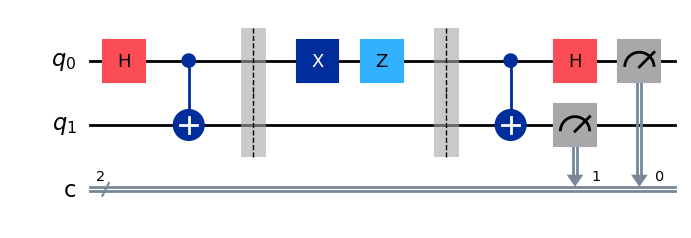

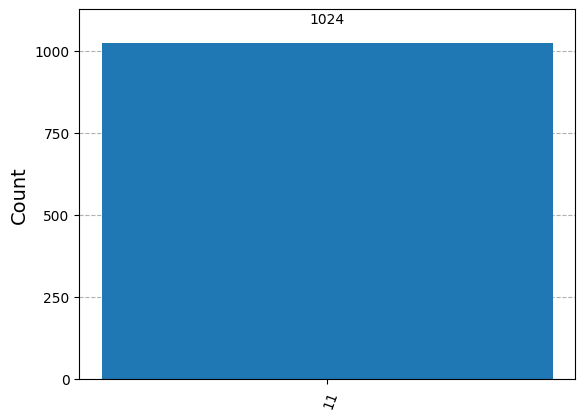

In [6]:
from qiskit import QuantumCircuit
## Initializing:
qc_test = QuantumCircuit(2,2)
## Preparing entangled state:
preparation(qc_test)
## Sender Receiver moves apart:
seperation(qc_test)
## Sender encodes h(is/er) qubit:
encoding(qc_test)
## Sender transmits h(is/er) encoded qubit physically to receiver:
transmission(qc_test)
# Receiver performs bell-measurement on both qubits :
bell_measure(qc_test)